# Регрессия как метод машинного обучения

а вот два видео: 
- [на английском](https://www.youtube.com/watch?v=nk2CQITm_eo)

- [на русском](https://www.youtube.com/watch?v=MM4onsNaLlI)

#### Классификация VS Регрессия 

**классификация** — предсказание категории объекта *(что за машина передо мной в пробке?)*

**регрессия** — предсказание места на числовой прямой *(когда будут самые сильные пробки?)*

Сегодня используют для:

- Медицинские диагнозы
- Любые зависимости числа от времени (прогнозы)
- Анализ изменения некоторой переменной (спросы/продажи/цены)

# Первичный анализ данных

На этом занятии мы попробуем задачу регрессии. Данные возьмем вот эти - https://www.kaggle.com/budincsevity/szeged-weather

Перед обучением модели, нужно подготовить данные:

- найти\собрать данные
- почистить и предобработать
- преобразовать в матрицы 


Часто это занимает на порядок больше времени, чем само обучение

In [79]:
# традиционная ячейка импортов
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [87]:
weather = pd.read_csv('weather.csv')

Первым делом стоит посмотреть на размер датасета

In [81]:
weather.shape
# (#строчек, #колонок)

(96453, 12)

Чтобы взглянуть на данные можно вывести несколько первых строчек.

In [82]:
weather.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [83]:
weather.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


Посмотреть все колонки датасета можно вот так

In [89]:
weather.columns

Index(['date', 'summary', 'precip', 'temp', 'app_temp', 'humidity',
       'wind_speed', 'wind_bearing', 'visibility', 'Loud Cover', 'pressure',
       'daily_summary'],
      dtype='object')

Пробелы и скобочки в названиях немного смущают. Давайте сделаем названия короче и с маленькой буквы

In [88]:
# можно переименовать колонки
weather.rename({'Formatted Date':'date', 'Temperature (C)':'temp', 'Apparent Temperature (C)':'app_temp',
                'Precip Type':'precip', 'Wind Speed (km/h)':'wind_speed', 'Humidity':'humidity',
                'Daily Summary':'daily_summary', "Wind Bearing (degrees)":"wind_bearing", "Visibility (km)":"visibility",
                "Pressure (millibars)":"pressure", "Summary":"summary"}, axis=1, inplace=True)
# последний аргумент  inplace=True позволяет пересохранять изменения сразу в датасете(без копирования объекта)



а можно создать новую колонку и присвоить ей значение старой, а затем отбросить старую

In [90]:
weather.head(5)

,date,summary,precip,temp,app_temp,humidity,wind_speed,wind_bearing,visibility,Loud Cover,pressure,daily_summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


В 5 строчках, на которые мы посмотрели в колонке Loud Cover одни нули. Давайте проверим, не бесполезная ли это колонка.

In [91]:
# кроме нулей ничего нет
weather['Loud Cover'].unique()

array([0.])

Отбросим эту колонку

In [92]:
weather.drop(['Loud Cover'], axis=1, inplace=True)

In [96]:
weather.shape
weather.head(5)

,date,summary,precip,temp,app_temp,humidity,wind_speed,wind_bearing,visibility,pressure,daily_summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


Можно посчитать статистики для отдельных колонок

In [98]:
weather = weather[["temp", "app_temp", "humidity", "wind_speed", "wind_bearing", "visibility", "pressure"]]

In [99]:
weather['pressure'].mean(), weather['pressure'].std()

(1003.2359558541468, 116.96990568258018)

In [100]:
weather['app_temp'].min(), weather['app_temp'].max()

(-27.716666666666665, 39.34444444444444)

Есть удобный метод ```.describe()```, которая собирает основные статистики для всех численных колонок.

In [101]:
weather.describe()

,temp,app_temp,humidity,wind_speed,wind_bearing,visibility,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [102]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          96453 non-null  float64
 1   app_temp      96453 non-null  float64
 2   humidity      96453 non-null  float64
 3   wind_speed    96453 non-null  float64
 4   wind_bearing  96453 non-null  float64
 5   visibility    96453 non-null  float64
 6   pressure      96453 non-null  float64
dtypes: float64(7)
memory usage: 5.2 MB


**Из этих статистик уже можно сделать первоначальные выводы.** 

1) видно, что в оставшихся данных нет пропусков.   
2) видно, что у колонок разные единицы измерения и соответствено значения разные (где-то от 0 до 1, где-то от -21 до 27)  
3) temp и app_temp очень похожи, но если посмотреть на Min и Max, то можно сделать вывод, что ощущаемая температура *отличается в меньшую сторону*

Чтобы посмотреть, как колонки связаны между собой, можно посчитать корреляцию.

In [103]:
# метод corr считает корреляцию всех колонок со всеми (острожнее, если у вас большой датасет)
weather.corr()

,temp,app_temp,humidity,wind_speed,wind_bearing,visibility,pressure
temp,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
app_temp,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
wind_speed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
wind_bearing,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
visibility,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
pressure,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


Для наглядности можно нарисовать тепловую карту.

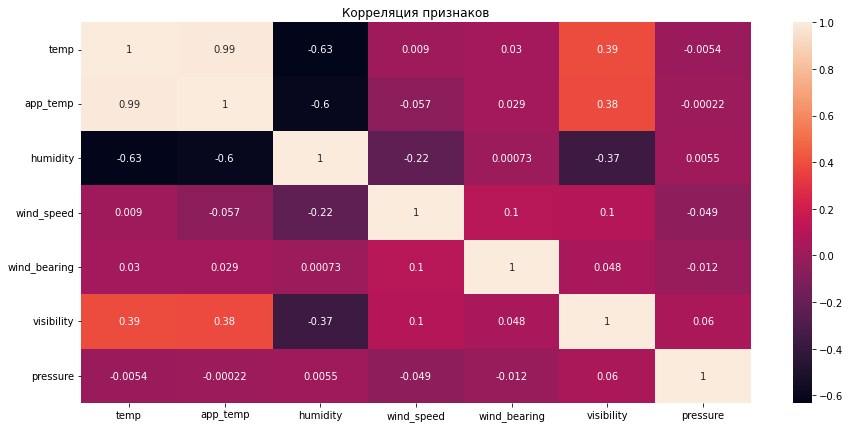

In [104]:
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(data=weather.corr(), annot=True, cmap= "rocket") 
# дополнительные цветовые схемы https://seaborn.pydata.org/tutorial/color_palettes.html

plt.title("Корреляция признаков") # подпись графика
plt.show()

Из тепловой карты можно сделать вывод, что: 
- влажность негативно скоррелирована с температурой
- скорость ветра не связана с температурой и связана с влажностью
- видимость связана с влажностью и с температурой

## Регрессия

Давайте теперь попробуем предсказывать данные для какой-то из колонок. Для простоты оставим только численные колонки. 


__добавить ячейки про то, что такое регрессия и как с ней жить__

## Регрессия в sklearn

In [105]:
# можно переопределить датасет его частью

# weather = weather[['temp','app_temp', 'humidity', 'wind_speed', 'visibility']]

weather.head(3)

,temp,app_temp,humidity,wind_speed,wind_bearing,visibility,pressure
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94


Попробуем несколько базовых регрессоров в sklearn.

In [106]:
# ! pip3 install sklearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.svm import LinearSVR

а вот [объяснение разницы между ними](https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/)

Sklearn умееть работать с dataframe из pandas (если там только числа), но часто матрицу объекты-признаки и целевую переменную (то, что мы хотим предсказать) удобно вынести в отдельные переменные в виде numpy массива. 

Давайте предугадаем скорость ветра по остальным параметрам датафрейма. Тогда значения скорости ветра станут целевой переменной, а остальные параметры (температура, влажность, и тд) попадут в матрицу объекты-признаки

In [107]:
humidity = weather["humidity"]
weather_no_h = weather.drop('humidity', axis=1)
X = weather_no_h.values # выбросили из датафрейма информацию про ветер

display(X, X.shape)

array([[   9.47222222,    7.38888889,   14.1197    ,  251.        ,
          15.8263    , 1015.13      ],
       [   9.35555556,    7.22777778,   14.2646    ,  259.        ,
          15.8263    , 1015.63      ],
       [   9.37777778,    9.37777778,    3.9284    ,  204.        ,
          14.9569    , 1015.94      ],
       ...,
       [  22.03888889,   22.03888889,    8.9838    ,   30.        ,
          16.1       , 1015.66      ],
       [  21.52222222,   21.52222222,   10.5294    ,   20.        ,
          16.1       , 1015.95      ],
       [  20.43888889,   20.43888889,    5.8765    ,   39.        ,
          15.5204    , 1016.16      ]])

(96453, 6)

In [109]:
y = humidity.values # отдельно вынесли массив со значениями скорости ветра
display(y, y.shape)

array([0.89, 0.86, 0.89, ..., 0.56, 0.6 , 0.61])

(96453,)

импортируем функцию, которая разобъет данные (матрицу "объект-признак" и массив со значениями целевой переменной) на 4 части:

- X_train - кусочек матрицы "объекты-признаки" (для обучения алгоритма)
- y_train - массив со значениями целевой переменной (для обучения)


- X_test - кусочек матрицы "объекты-признаки" (для тестирования и валидации алгоритма)
- y_test - массив со значениями целевой переменной (для тестирования и валидации алгоритма)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # создали переменные, разделили данные

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72339, 6), (24114, 6), (72339,), (24114,))

Ridge - это линейная регрессия с L2 регуляризацией [что это?](https://www.youtube.com/watch?v=Q81RR3yKn30). 

В процессе обучения модель суммирует признаки с каким-то весами, чтобы получить предсказание. Веса подбираются во время обучения и на их значение накладывается ограничение (регуляризация), так чтобы они не получались слишком большими.

Давайте попробуем **регрессию** [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [115]:
# силу регуляризации можно варьировать параметром alpha
ridge_regressor = Ridge(alpha=0.01)

ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.01)

In [118]:
ridge_regressor.predict([[1,2,3,4,5,6],[9.472222,7.388889,14.1197,251.0,15.8263,1015.13]])

array([0.9790327, 0.7126792])

### оценка результатов алгоритма

В качестве метрики будем использовать [среднюю абсолютную ошибку](https://www.youtube.com/watch?v=ZejnwbcU8nw). Она показывает отклонение от правильного ответа в тех же единах измерения

*(а вообще есть [разные способы](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b))*

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Чтобы оценить качество модели, предскажем значения целевой переменной на тестовой выборке и сравним с настоящими значениями.

In [120]:
preds = ridge_regressor.predict(X_test)

In [121]:
len(preds)

24114

In [122]:
mean_absolute_error(y_test, preds)

0.11408693460978378

In [123]:
mean_squared_error(y_test, preds)

0.020296675177113095

In [124]:
r2_score(y_test, preds)

0.46844801845749784

Т.е. в среднем мы ошибаемся в скорости ветра на 4 км/ч

Попробуем другие алгоритмы.

Иногда бывает полезно [нормализовать](https://en.wikipedia.org/wiki/Normalization_(statistics)) данные (вычесть среднее и разделить на стандартное отклонение). После нормализации среднее всех колонок будет равно 0, а стандартное отклонение 1. Это позволяет исправить ситуацию, когда признаки представлены в разных единацах измерения. 
Для этого используется StandardScaler. 

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, random_state=42)

In [135]:
y_train

array([0.62, 0.45, 0.46, ..., 0.81, 0.82, 0.9 ])

До стандартизации:

In [127]:
list(X[0])

[9.47222222222222,
 7.388888888888887,
 14.1197,
 251.0,
 15.826300000000002,
 1015.13]

После:

In [128]:
list(sc.fit_transform(X)[0])

[-0.2575990198317457,
 -0.3240354682443153,
 0.4786349929804726,
 0.5912560030170744,
 1.3069757788836067,
 0.1016851790563222]

теперь с данными удобнее работать

In [129]:
lasso_regressor = Lasso(alpha=0.001)
lasso_regressor.fit(X_train, y_train)
preds = lasso_regressor.predict(X_test)


print(mean_absolute_error(y_test, preds))
print(r2_score(y_test, preds))

0.11514294513944444
0.45767561708276494


In [130]:
# добавим параметр нормализации

lasso_regressor = Lasso(alpha=0.1) # попробуйте его поменять
lasso_regressor.fit(X_train, y_train)
preds = lasso_regressor.predict(X_test)
print(mean_absolute_error(y_test, preds))
print(r2_score(y_test, preds))

0.15110093672040453
0.13858867761920335


Lasso - линейная регрессия с L1 регуляризацией. Она немного медленее Ridge и обычно работает немного хуже, но она позволяет проводить отбор признаков.

In [78]:
regressor = Lasso(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

5.163204761310105

Такая модель использует для предсказания только влажность. В реальной задаче, нулевые признаки можно выбросить, для того, чтобы упросить модель.